In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
solar_df   = pd.read_csv("Data_Cacak.csv",index_col='Datetime',parse_dates=True)
solar_df.head()

,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,Production - Location 1,Production - Location 2,Production - Location 3
Datetime,,,,,,,,,
2022-11-22 14:00:00,8.7,59,117,0.0,0,117,11.705333,12.694917,16.355417
2022-11-22 15:00:00,8.9,62,62,0.0,0,62,1.309583,8.262333,1.812333
2022-11-22 16:00:00,9.2,57,15,7.0,1,16,0.000000,0.930667,0.000000
2022-11-22 17:00:00,8.9,81,0,0.0,0,0,0.000000,0.000000,0.000000
2022-11-22 18:00:00,8.9,91,0,0.0,0,0,0.000000,0.000000,0.000000


<Axes: xlabel='Datetime'>

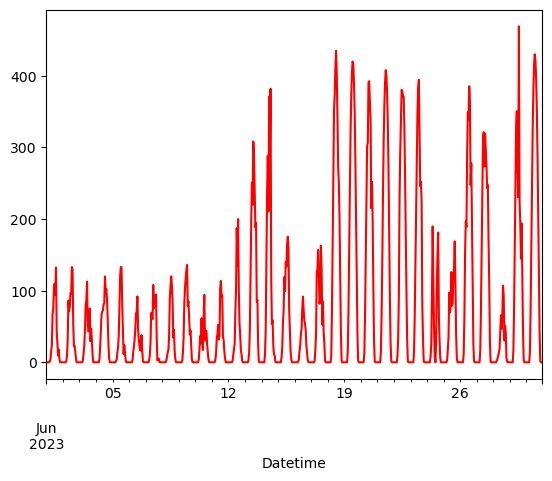

In [141]:
jun_2023_data = solar_df.loc['2023-6']
jun_2023_data['Production - Location 1'].plot(color='red')

<Axes: xlabel='Datetime'>

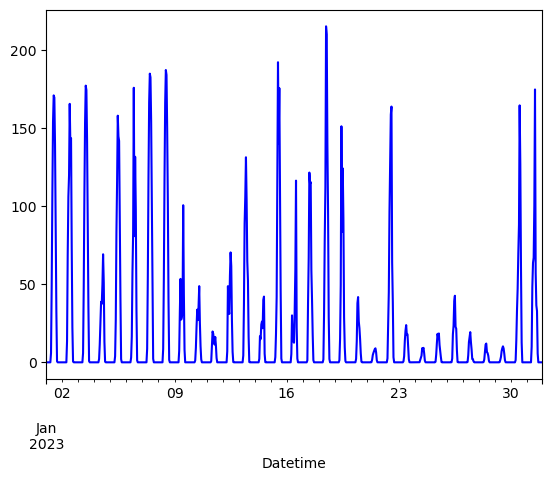

In [142]:
jan_2023_data = solar_df.loc['2023-1']
jan_2023_data['Production - Location 1'].plot(color='blue')

In [143]:
prev_time = solar_df.index[0]


for current_time in solar_df.index[1:]:
    expected_time = prev_time + pd.Timedelta(hours=1)
    
    if current_time != expected_time:
        print(f"Missing hour detected between {prev_time} and {current_time}")
        print(f"Expected {expected_time}, found {current_time}")
    
    prev_time = current_time

Missing hour detected between 2023-03-26 01:00:00 and 2023-03-26 03:00:00
Expected 2023-03-26 02:00:00, found 2023-03-26 03:00:00
Missing hour detected between 2023-10-29 02:00:00 and 2023-10-29 02:00:00
Expected 2023-10-29 03:00:00, found 2023-10-29 02:00:00


In [144]:
# 1. First ensure your index is datetime type
solar_df.index = pd.to_datetime(solar_df.index)

# 2. Localize to Serbia's timezone (Europe/Belgrade)
solar_df.index = solar_df.index.tz_localize('Europe/Belgrade', 
                                          ambiguous='infer',  # Handles duplicate 02:00 hour in fall
                                          nonexistent='shift_forward')  # Handles missing 02:00 in spring

# 3. Now convert to UTC
solar_df.index = solar_df.index.tz_convert('UTC')

# Verify the results
solar_df.loc['2023-03-26 00:00':'2023-03-26 03:00'].head()  # Spring transition

,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,Production - Location 1,Production - Location 2,Production - Location 3
Datetime,,,,,,,,,
2023-03-26 00:00:00+00:00,8.4,0,0,0.0,0,0,0.0,0.0,0.0
2023-03-26 01:00:00+00:00,6.0,3,0,0.0,0,0,0.0,0.0,0.0
2023-03-26 02:00:00+00:00,4.9,0,0,0.0,0,0,0.0,0.0,0.0
2023-03-26 03:00:00+00:00,4.2,0,0,0.0,0,0,0.0,0.0,0.0


In [145]:
solar_df.loc['2023-10-29 00:00':'2023-10-29 03:00'].head()  # Fall transition

,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,Production - Location 1,Production - Location 2,Production - Location 3
Datetime,,,,,,,,,
2023-10-29 00:00:00+00:00,9.5,28,0,0.0,0,0,0.0,0.0,0.0
2023-10-29 01:00:00+00:00,9.5,36,0,0.0,0,0,0.0,0.0,0.0
2023-10-29 02:00:00+00:00,9.3,10,0,0.0,0,0,0.0,0.0,0.0
2023-10-29 03:00:00+00:00,8.5,0,0,0.0,0,0,0.0,0.0,0.0


#### check for messing data an other time

In [147]:
prev_time = solar_df.index[0]

# Iterate through the index to check continuity
for current_time in solar_df.index[1:]:
    expected_time = prev_time + pd.Timedelta(hours=1)
    
    if current_time != expected_time:
        print(f"Missing hour detected between {prev_time} and {current_time}")
        print(f"Expected {expected_time}, found {current_time}")
    
    prev_time = current_time

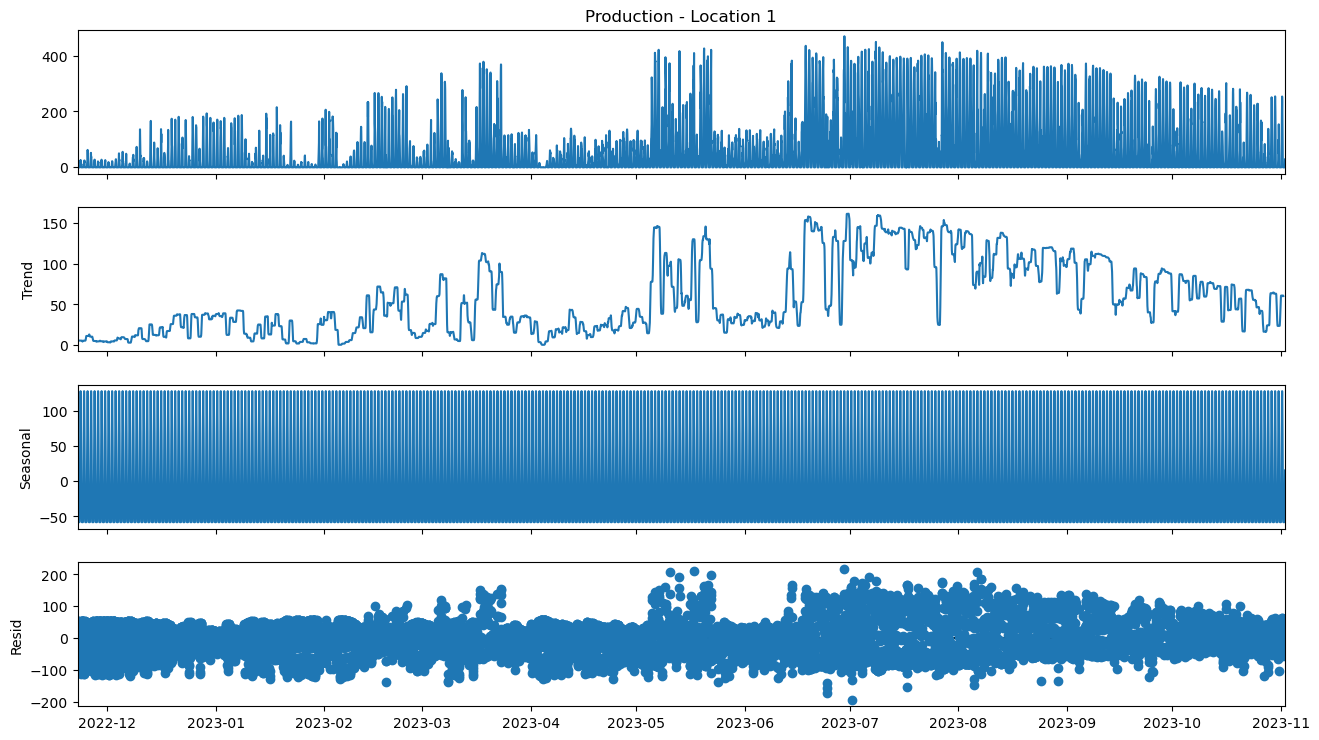

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose

# plt.close('all')
results = seasonal_decompose(solar_df['Production - Location 1'])
results.plot()
plt.gcf().set_size_inches(15, 8)  # gcf = "Get Current Figure"
# plt.tight_layout()
plt.show()

In [149]:
solar_df.size

74466

In [150]:
solar_df['time']=solar_df.index.hour
features = ['AirTemperature', 'CloudOpacity', 'DHI', 'DNI', 'EBH', 'GHI','time']
target = 'Production - Location 1'
solar_df = solar_df[features + [target]]
# solar_df.drop(columns=["Production - Location 2",	"Production - Location 3"],inplace=True)
solar_df.head()

,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,time,Production - Location 1
Datetime,,,,,,,,
2022-11-22 13:00:00+00:00,8.7,59,117,0.0,0,117,13,11.705333
2022-11-22 14:00:00+00:00,8.9,62,62,0.0,0,62,14,1.309583
2022-11-22 15:00:00+00:00,9.2,57,15,7.0,1,16,15,0.000000
2022-11-22 16:00:00+00:00,8.9,81,0,0.0,0,0,16,0.000000
2022-11-22 17:00:00+00:00,8.9,91,0,0.0,0,0,17,0.000000


In [151]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(solar_df)

In [152]:
split_ratio = 0.8  # 80% train, 20% test
split_idx = int(len(scaled_data) * split_ratio)
train_data = scaled_data[:split_idx]
test_data = scaled_data[split_idx:]

In [188]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

# Parameters
SEQ_LENGTH = 6  # Use 24 hours of past data to predict next hour
BATCH_SIZE = 32

# Create sequences for training
X_train = train_data[:, :-1]  # All columns except target
y_train = train_data[:, -1]   # Target column

train_dataset = timeseries_dataset_from_array(
    X_train, y_train,
    sequence_length=SEQ_LENGTH,
    batch_size=BATCH_SIZE,
)

# Repeat for test data
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

test_dataset = timeseries_dataset_from_array(
    X_test, y_test,
    sequence_length=SEQ_LENGTH,
    batch_size=BATCH_SIZE,
)

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(SEQ_LENGTH, len(features))),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(1)  # Predicts a single value (solar production)
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']  
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [190]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
)

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.0089 - mae: 0.0619 - val_loss: 0.0087 - val_mae: 0.0664
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0070 - mae: 0.0527 - val_loss: 0.0056 - val_mae: 0.0526
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0062 - mae: 0.0503 - val_loss: 0.0041 - val_mae: 0.0460
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0060 - mae: 0.0489 - val_loss: 0.0036 - val_mae: 0.0423
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0059 - mae: 0.0476 - val_loss: 0.0034 - val_mae: 0.0407
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0056 - mae: 0.0463 - val_loss: 0.0031 - val_mae: 0.0386
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0057 - mae: 0.0455 - val_loss: 0.0028 - val_mae: 0.0360
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0055 - mae: 0.0437 - val_loss: 0.0027 - val_mae: 0.0351
Epoch 9/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms

In [191]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(test_dataset)


y_test_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
y_test_pred = np.concatenate([model.predict(x) for x, _ in test_dataset], axis=0)

def inverse_scale_target(y):
    dummy = np.zeros((len(y), len(features) + 1))
    dummy[:, -1] = y.flatten()
    return scaler.inverse_transform(dummy)[:, -1]

y_test_true_actual = inverse_scale_target(y_test_true)
y_test_pred_actual = inverse_scale_target(y_test_pred)


mae = mean_absolute_error(y_test_true_actual, y_test_pred_actual)
mse = mean_squared_error(y_test_true_actual, y_test_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_true_actual, y_test_pred_actual)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.2f}")

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━